In [1]:
!pip install python-mnist

In [1]:
%run __init__.py

Using TensorFlow backend.


In [2]:
mndata = MNIST('./python-mnist/data')
X_train,y_train=mndata.load_training()
X_test, y_test=mndata.load_testing()
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test= np.array(X_test)
y_test=np.array(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [3]:
#logistic regression- we'll need to run in batches- we'll use keras
X_train1 = X_train.reshape(60000,28,28)
X_test1 = X_test.reshape(10000,28,28)
X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')
X_train1 /= 255 # scaling
X_test1 /= 255
X_train1 = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], X_train1.shape[2], 1)# 1 becuase we have 1 channel- because black and white
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], X_test1.shape[2], 1)
y_train1 = keras.utils.to_categorical(y_train, 10)
y_test1 = keras.utils.to_categorical(y_test, 10)

In [4]:
LR = Sequential([
    Flatten(input_shape=(28,28,1), name= "flatten_1_mlp"),
    Dense(10, activation='softmax')
])

In [5]:
LR.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1_mlp (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
LR.compile(optimizer=keras.optimizers.SGD(), 
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

In [11]:
LR_history=LR.fit(X_train, y_train, validation_split=.2, epochs=100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 44us/step - loss: 0.8566 - acc: 0.7921 - val_loss: 0.5118 - val_acc: 0.8748
Epoch 2/100
48000/48000 [==============================] - 2s 38us/step - loss: 0.4913 - acc: 0.8739 - val_loss: 0.4189 - val_acc: 0.8926
Epoch 3/100
48000/48000 [==============================] - 2s 38us/step - loss: 0.4291 - acc: 0.8866 - val_loss: 0.3841 - val_acc: 0.8981
Epoch 4/100
48000/48000 [==============================] - 2s 38us/step - loss: 0.3984 - acc: 0.8922 - val_loss: 0.3629 - val_acc: 0.9037
Epoch 5/100
48000/48000 [==============================] - 2s 38us/step - loss: 0.3791 - acc: 0.8954 - val_loss: 0.3483 - val_acc: 0.9075
Epoch 6/100
48000/48000 [==============================] - 2s 38us/step - loss: 0.3654 - acc: 0.8994 - val_loss: 0.3384 - val_acc: 0.9084
Epoch 7/100
48000/48000 [==============================] - 2s 38us/step - loss: 0.3552 - acc: 0.9016 - val_loss: 0.3312 - 

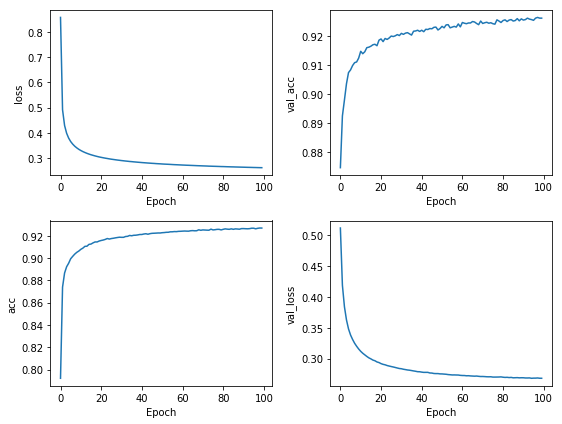

In [13]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(LR_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()

In [24]:
score = LR.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(LR.predict_classes(X_test[1:5]))
print(y_test[1:5])

10000/10000 [==============================] - 0s 18us/step
Test score: 0.271047123116
Test accuracy: 0.9236
[2 1 0 4]
[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
y_pred = LR.predict_classes(X_test)
print(y_pred)
print(y_test)
#p=model.predict_proba(X_test) # to predict probability

print(classification_report(y_test, y_pred))
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       980
          1       0.97      0.98      0.97      1135
          2       0.93      0.90      0.91      1032
          3       0.91      0.91      0.91      1010
          4       0.92      0.94      0.93       982
          5       0.91      0.86      0.88       892
          6       0.94      0.95      0.94       958
          7       0.93      0.92      0.93      1028
          8       0.88      0.89      0.88       974
          9       0.91      0.90      0.90      1009

avg / total       0.92      0.92      0.92     10000

[[ 964    0    1    1    0    6    6    1    1    0]
 [   0 1111    3    2    0    1    4    2   12    0]
 [   5   10  925   14   11    4   11    8   38    6]
 [   3    1   19  918    0   25    3   12   20    9]
 [   1    2    5    2  919    0   10    3    8   32]
 [   9    2    5   36    8  770   17    6   32    7]
 [  1

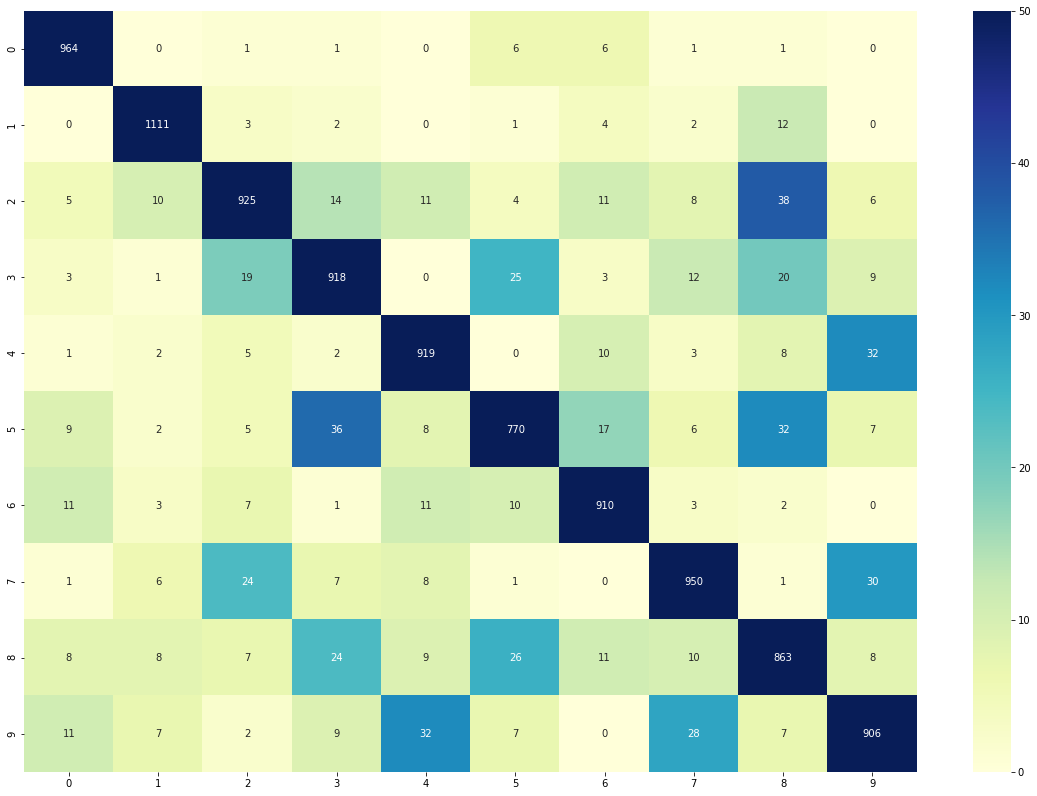

In [75]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (15,12))
sn.heatmap(df_cm, annot=True, fmt="g", cmap="YlGnBu", vmax=50)

In [10]:
LR_history=LR.fit(X_train1, y_train1, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2767 - acc: 0.9226
Epoch 2/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2748 - acc: 0.9233
Epoch 3/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2735 - acc: 0.9238
Epoch 4/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2723 - acc: 0.9240
Epoch 5/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2714 - acc: 0.9247
Epoch 6/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2706 - acc: 0.9246
Epoch 7/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2699 - acc: 0.9250
Epoch 8/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2693 - acc: 0.9251
Epoch 9/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2686 - acc: 0.9256
Epoch 10/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2681 - a

60000/60000 [==============================] - 2s 33us/step - loss: 0.2522 - acc: 0.9309
Epoch 82/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2520 - acc: 0.9309
Epoch 83/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2520 - acc: 0.9307
Epoch 84/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2518 - acc: 0.9315
Epoch 85/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2517 - acc: 0.9310
Epoch 86/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2516 - acc: 0.9311
Epoch 87/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2515 - acc: 0.9309
Epoch 88/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2514 - acc: 0.9311
Epoch 89/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2513 - acc: 0.9309
Epoch 90/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2512 - acc: 

In [12]:
score = LR.evaluate(X_test1, y_test1)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(LR.predict_classes(X_test1[1:5]))
print(y_test1[1:5])

10000/10000 [==============================] - 0s 19us/step
Test score: 0.266761075622
Test accuracy: 0.9249
[2 1 0 4]
[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [16]:
y_pred = LR.predict_classes(X_test1)
print(y_pred)
print(y_test)
#p=model.predict_proba(X_test) # to predict probability

print(classification_report(y_test, y_pred))
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       980
          1       0.97      0.98      0.97      1135
          2       0.93      0.90      0.92      1032
          3       0.90      0.92      0.91      1010
          4       0.92      0.93      0.93       982
          5       0.91      0.87      0.89       892
          6       0.94      0.95      0.94       958
          7       0.93      0.92      0.93      1028
          8       0.89      0.88      0.88       974
          9       0.91      0.90      0.91      1009

avg / total       0.92      0.92      0.92     10000

[[ 960    0    2    3    0    6    5    3    1    0]
 [   0 1111    3    2    0    2    4    2   11    0]
 [   4    9  932   17    8    3   12    9   31    7]
 [   2    1   16  927    0   23    3   11   17   10]
 [   1    2    5    3  918    0    9    3   10   31]
 [   9    2    4   37   12  774   16    8   26    4]
 [  1

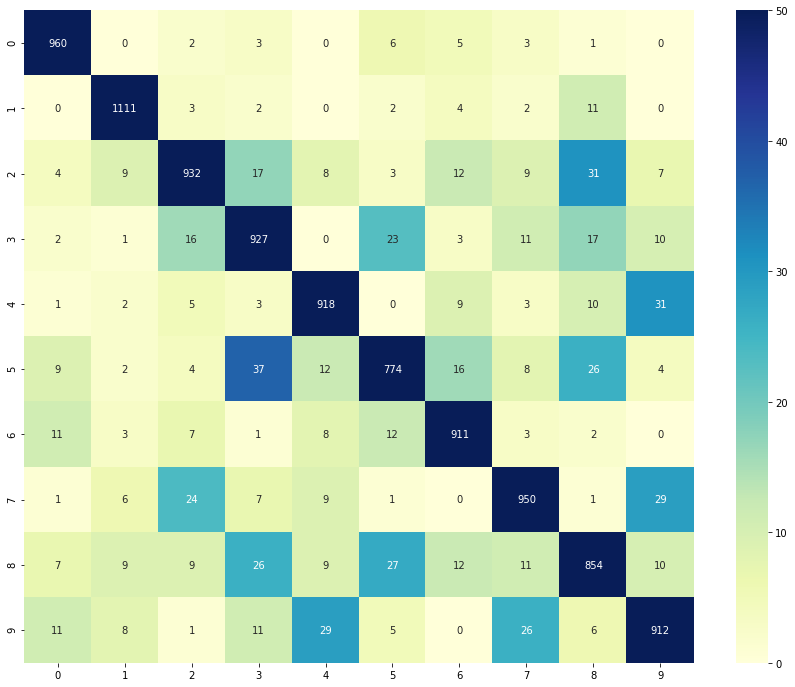

In [17]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (15,12))
sn.heatmap(df_cm, annot=True, fmt="g", cmap="YlGnBu", vmax=50)

In [4]:
KNN=KNeighborsClassifier()

In [5]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [6]:
t1 = time()
KNN.fit(X_train,y_train)
t2 = time()
display(t2-t1)

8.980120182037354

In [7]:
t1 = time()
display(KNN.score(X_test,y_test))
t2 = time()
display(t2-t1)

0.96879999999999999

768.4667642116547

KNN is fast to fit but slow to score ot test data

In [18]:
t1 = time()

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

t2 = time()
display(t2-t1)

58.282710790634155

In [19]:
t1 = time()
display(ada.score(X_test, y_test))

t2 = time()
display(t2-t1)

0.72989999999999999

0.4182884693145752

In [ ]:
t1 = time()

svc = SVC()
svc.fit(X_train, y_train)

t2 = time()
display(t2-t1)

In [ ]:
t1 = time()
display(svc.score(X_test, y_test))

t2 = time()
display(t2-t1)